In [8]:
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np

# Calc FLOPS

In [9]:
from calc_pseudo import clean, basic_flops
B_TARGET_PANEL_WIDTH = 48

In [10]:
MAT_PATH = "./../../example_mats_med/"
mat_paths = sum([[os.path.join(dir, file) for file in files] for dir, _, files in os.walk(MAT_PATH)], [])
MAT_PATH_SMALL = "./../../example_mats_small/"
mat_paths_small = sum([[os.path.join(dir, file) for file in files] for dir, _, files in os.walk(MAT_PATH_SMALL)], [])

In [11]:
mat_flops = {}
mat_flops_small = {}

In [12]:
for mat_path in mat_paths:
    with open(mat_path) as f:
        test_mat = clean(np.loadtxt(f))
    FLOPS_PER_PANEL = basic_flops(test_mat, B_TARGET_PANEL_WIDTH)
    
    mat_flops[mat_path.split("./../../")[1]] = FLOPS_PER_PANEL

In [13]:
for mat_path in mat_paths_small:
    with open(mat_path) as f:
        test_mat = clean(np.loadtxt(f))
    FLOPS_PER_PANEL = basic_flops(test_mat, B_TARGET_PANEL_WIDTH)
    
    mat_flops_small[mat_path.split("./../../")[1]] = FLOPS_PER_PANEL

## Load Data

In [14]:
LOG_DIR = "./../../logs/reg_pack/pyfr/"

In [15]:
# 'a_cols'
# 'a_nonzero'
# 'a_rows'
# 'a_size'
# 'a_unique'
# 'density'
# 'mat_file'
# 'speedup_avg'
# 'speedup_best'
# 'xsmm_local_avg'
# 'xsmm_local_best'
# 'xsmm_upstream_avg'
# 'xsmm_upstream_best'

with open(LOG_DIR+"run_1.dat", "rb") as f:
    run_1 = pickle.load(f)
with open(LOG_DIR+"run_2.dat", "rb") as f:
    run_2 = pickle.load(f)
with open(LOG_DIR+"run_3.dat", "rb") as f:
    run_3 = pickle.load(f)

# upstream more
with open(LOG_DIR+"dense/run_1.dat", "rb") as f:
    dense_run_1 = pickle.load(f)
with open(LOG_DIR+"dense/run_2.dat", "rb") as f:
    dense_run_2 = pickle.load(f)
with open(LOG_DIR+"dense/run_3.dat", "rb") as f:
    dense_run_3 = pickle.load(f)

with open(LOG_DIR+"small/run_1.dat", "rb") as f:
    small_run_1 = pickle.load(f)
with open(LOG_DIR+"small/run_2.dat", "rb") as f:
    small_run_2 = pickle.load(f)
with open(LOG_DIR+"small/run_3.dat", "rb") as f:
    small_run_3 = pickle.load(f)

## Sort Data

In [16]:
def sort_values(x_term, run, mat_flops, t='best'):
    NUM_PANELS = 192000 / 48

    local_best = []
    ref_best = []
    local_best_x, local_best_y = [], []
    ref_best_x, ref_best_y = [], []

    for i, u in enumerate(run[x_term]):
        FLOPS_PER_PANEL = mat_flops[run['mat_file'][i]]

        time_per_panel_local = (run['xsmm_local_'+t][i]*1e-3)/NUM_PANELS
        time_per_panel_ref   = (run['xsmm_upstream_'+t][i]*1e-3)/NUM_PANELS
        
        local_best_x.append(u)
        local_best_y.append(FLOPS_PER_PANEL / time_per_panel_local)
        ref_best_x.append(u)
        ref_best_y.append(FLOPS_PER_PANEL / time_per_panel_ref)
    
    old_len = len(local_best_y)

    local_best_y = [x for _,x in sorted(zip(local_best_x,local_best_y))]
    local_best_x.sort()
    
    assert(old_len == len(local_best_y))

    ref_best_y = [x for _,x in sorted(zip(ref_best_x,ref_best_y))]
    ref_best_x.sort()

    return local_best_x, local_best_y, ref_best_x, ref_best_y

In [17]:
x_terms = ['a_unique', 'a_cols', 'a_rows', 'a_size', 'density']
xlabels = ['Number of Unique Constants', 'Number of Columns',
           'Number of Rows', 'Size', 'Density']
xtitles = ['Number of Unique Constants in A', 'Number of Columns in A',
           'Number of Rows in A', 'Size of A', 'Density of A']

# Quad

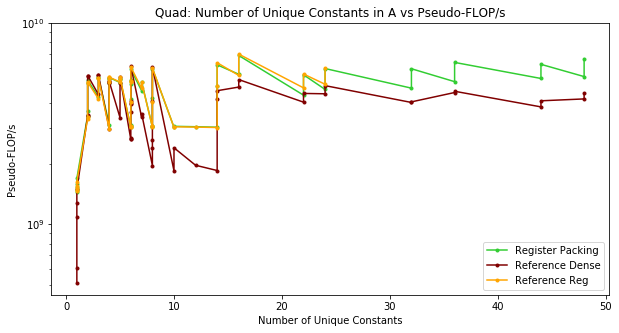

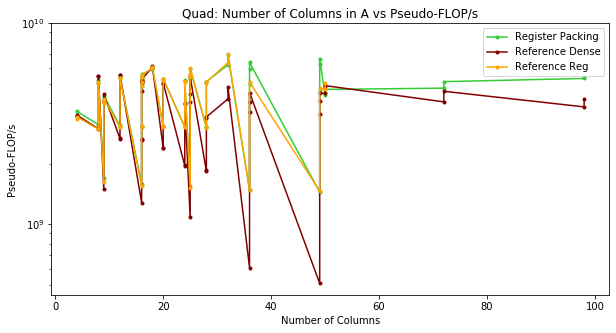

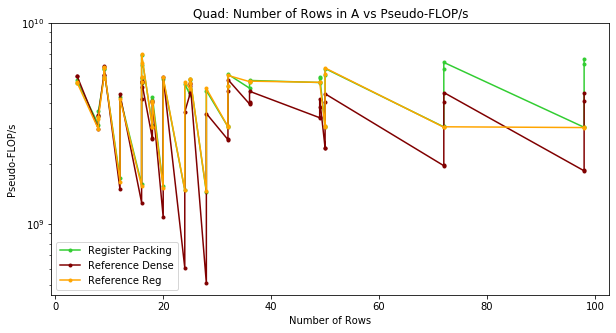

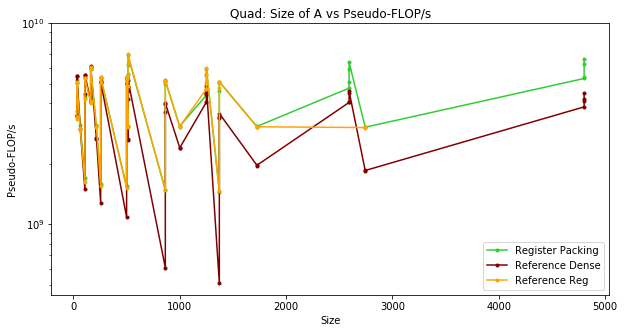

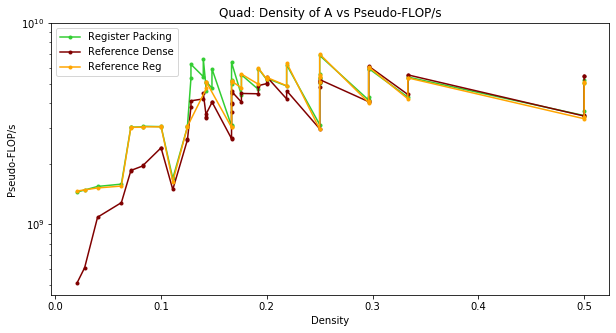

In [18]:
for i, x_term in enumerate(x_terms):
    # plot best
    plt.figure(figsize=(10,5))
    local_best_x1, local_best_y1, ref_best_x1, ref_best_y1 = \
        sort_values(x_term, run_1["quad"], mat_flops, 'best')
    local_best_x2, local_best_y2, ref_best_x2, ref_best_y2 = \
        sort_values(x_term, run_2["quad"], mat_flops, 'best')
    local_best_x3, local_best_y3, ref_best_x3, ref_best_y3 = \
        sort_values(x_term, run_3["quad"], mat_flops, 'best')
    local_best_y_avg = [sum(elem)/len(elem) for elem in zip(local_best_y1, local_best_y2, local_best_y3)]
    ref_best_y_avg = [sum(elem)/len(elem) for elem in zip(ref_best_y1, ref_best_y2, ref_best_y3)]
    
    _, _, dense_best_x1, dense_best_y1 = \
        sort_values(x_term, dense_run_1["quad"], mat_flops, 'best')
    _, _, dense_best_x2, dense_best_y2 = \
        sort_values(x_term, dense_run_2["quad"], mat_flops, 'best')
    _, _, dense_best_x3, dense_best_y3 = \
        sort_values(x_term, dense_run_3["quad"], mat_flops, 'best')
    dense_best_y_avg = [sum(elem)/len(elem) for elem in zip(dense_best_y1, dense_best_y2, dense_best_y3)]

    _, _, small_best_x1, small_best_y1 = \
        sort_values(x_term, small_run_1["quad"], mat_flops_small, 'best')
    _, _, small_best_x2, small_best_y2 = \
        sort_values(x_term, small_run_2["quad"], mat_flops_small, 'best')
    _, _, small_best_x3, small_best_y3 = \
        sort_values(x_term, small_run_3["quad"], mat_flops_small, 'best')
    small_best_y_avg = [sum(elem)/len(elem) for elem in zip(small_best_y1, small_best_y2, small_best_y3)]

    plt.plot(local_best_x1, local_best_y_avg, label="Register Packing", color="limegreen", marker=".")
#     plt.plot(ref_best_x1, ref_best_y_avg, label="Reference", color="maroon", marker=".")
    plt.plot(dense_best_x1, dense_best_y_avg, label="Reference Dense", color="maroon", marker=".")
    plt.plot(small_best_x1, small_best_y_avg, label="Reference Reg", color="orange", marker=".")
    
    plt.xlabel(xlabels[i])
    plt.ylabel("Pseudo-FLOP/s")
    plt.yscale("log", basey=10)
    plt.title("Quad: " + xtitles[i] + " vs Pseudo-FLOP/s")
    plt.ylim(top=10e9)
    plt.legend()
    plt.savefig("./../../plots/reg_packing_comp/pyfr/quad/"+x_term+".pdf")
    plt.show()

# Hex

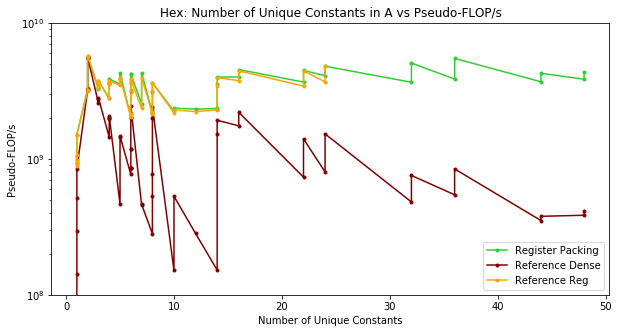

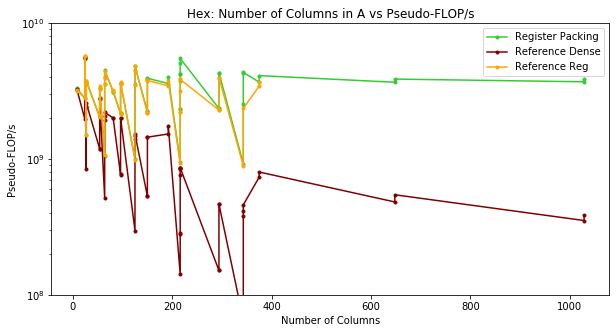

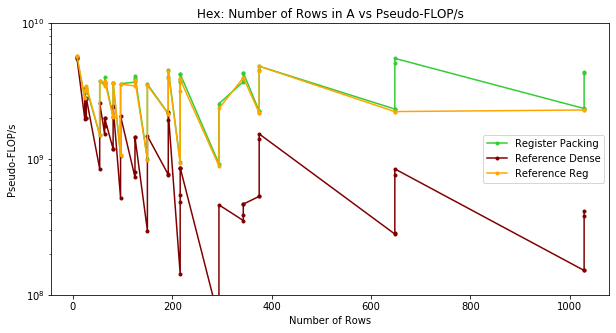

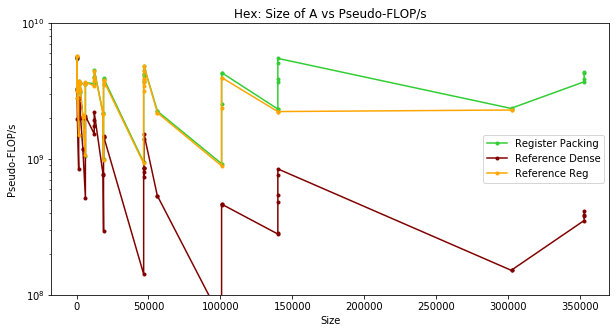

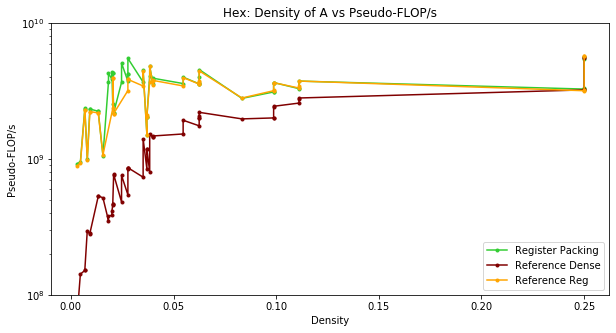

In [19]:
for i, x_term in enumerate(x_terms):
    # plot best
    plt.figure(figsize=(10,5))
    local_best_x1, local_best_y1, ref_best_x1, ref_best_y1 = \
        sort_values(x_term, run_1["hex"], mat_flops, 'best')
    local_best_x2, local_best_y2, ref_best_x2, ref_best_y2 = \
        sort_values(x_term, run_2["hex"], mat_flops, 'best')
    local_best_x3, local_best_y3, ref_best_x3, ref_best_y3 = \
        sort_values(x_term, run_3["hex"], mat_flops, 'best')
    local_best_y_avg = [sum(elem)/len(elem) for elem in zip(local_best_y1, local_best_y2, local_best_y3)]
    ref_best_y_avg = [sum(elem)/len(elem) for elem in zip(ref_best_y1, ref_best_y2, ref_best_y3)]
    
    _, _, dense_best_x1, dense_best_y1 = \
        sort_values(x_term, dense_run_1["hex"], mat_flops, 'best')
    _, _, dense_best_x2, dense_best_y2 = \
        sort_values(x_term, dense_run_2["hex"], mat_flops, 'best')
    _, _, dense_best_x3, dense_best_y3 = \
        sort_values(x_term, dense_run_3["hex"], mat_flops, 'best')
    dense_best_y_avg = [sum(elem)/len(elem) for elem in zip(dense_best_y1, dense_best_y2, dense_best_y3)]

    _, _, small_best_x1, small_best_y1 = \
        sort_values(x_term, small_run_1["hex"], mat_flops_small, 'best')
    _, _, small_best_x2, small_best_y2 = \
        sort_values(x_term, small_run_2["hex"], mat_flops_small, 'best')
    _, _, small_best_x3, small_best_y3 = \
        sort_values(x_term, small_run_3["hex"], mat_flops_small, 'best')
    small_best_y_avg = [sum(elem)/len(elem) for elem in zip(small_best_y1, small_best_y2, small_best_y3)]

    plt.plot(local_best_x1, local_best_y_avg, label="Register Packing", color="limegreen", marker=".")
    #plt.plot(ref_best_x1, ref_best_y_avg, label="Reference", color="maroon", marker=".")
    plt.plot(dense_best_x1, dense_best_y_avg, label="Reference Dense", color="maroon", marker=".")
    plt.plot(small_best_x1, small_best_y_avg, label="Reference Reg", color="orange", marker=".")
    
    plt.xlabel(xlabels[i])
    plt.ylabel("Pseudo-FLOP/s")
    plt.yscale("log", basey=10)
    plt.ylim(1e8, 1e10)
    plt.title("Hex: " + xtitles[i] + " vs Pseudo-FLOP/s")
    plt.legend()
    plt.savefig("./../../plots/reg_packing_comp/pyfr/hex/"+x_term+".pdf")
    plt.show()

# Tet

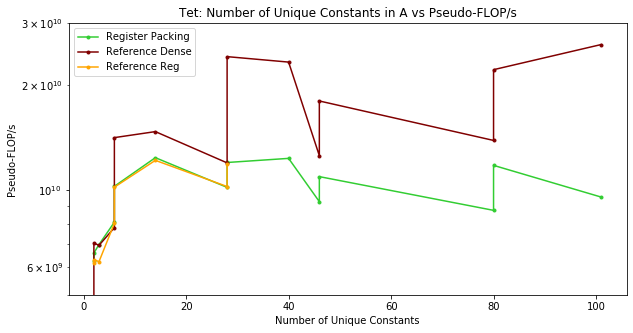

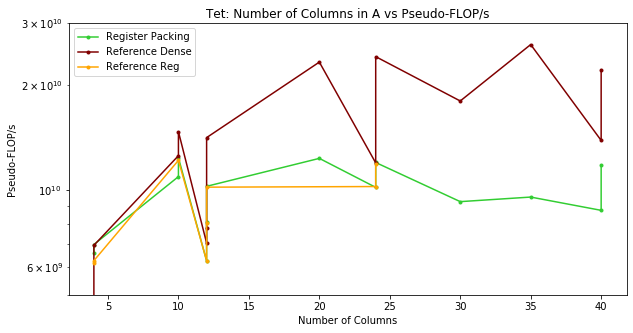

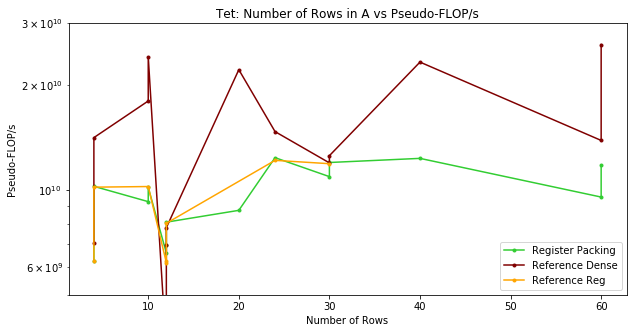

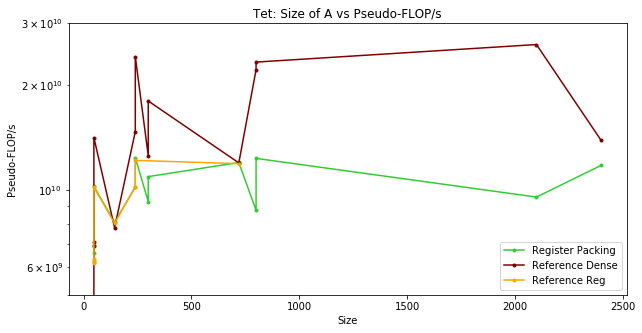

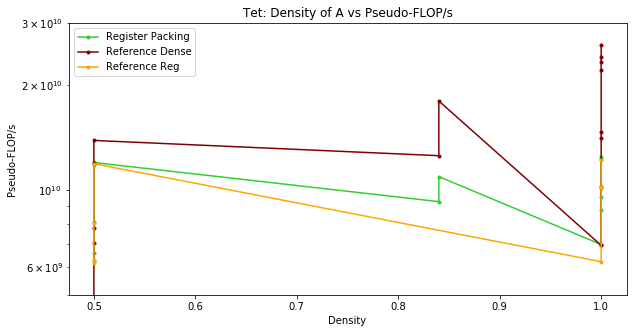

In [20]:
for i, x_term in enumerate(x_terms):
    # plot best
    plt.figure(figsize=(10,5))
    local_best_x1, local_best_y1, ref_best_x1, ref_best_y1 = \
        sort_values(x_term, run_1["tet"], mat_flops, 'best')
    local_best_x2, local_best_y2, ref_best_x2, ref_best_y2 = \
        sort_values(x_term, run_2["tet"], mat_flops, 'best')
    local_best_x3, local_best_y3, ref_best_x3, ref_best_y3 = \
        sort_values(x_term, run_3["tet"], mat_flops, 'best')
    local_best_y_avg = [sum(elem)/len(elem) for elem in zip(local_best_y1, local_best_y2, local_best_y3)]
    ref_best_y_avg = [sum(elem)/len(elem) for elem in zip(ref_best_y1, ref_best_y2, ref_best_y3)]
    
    _, _, dense_best_x1, dense_best_y1 = \
        sort_values(x_term, dense_run_1["tet"], mat_flops, 'best')
    _, _, dense_best_x2, dense_best_y2 = \
        sort_values(x_term, dense_run_2["tet"], mat_flops, 'best')
    _, _, dense_best_x3, dense_best_y3 = \
        sort_values(x_term, dense_run_3["tet"], mat_flops, 'best')
    dense_best_y_avg = [sum(elem)/len(elem) for elem in zip(dense_best_y1, dense_best_y2, dense_best_y3)]

    _, _, small_best_x1, small_best_y1 = \
        sort_values(x_term, small_run_1["tet"], mat_flops_small, 'best')
    _, _, small_best_x2, small_best_y2 = \
        sort_values(x_term, small_run_2["tet"], mat_flops_small, 'best')
    _, _, small_best_x3, small_best_y3 = \
        sort_values(x_term, small_run_3["tet"], mat_flops_small, 'best')
    small_best_y_avg = [sum(elem)/len(elem) for elem in zip(small_best_y1, small_best_y2, small_best_y3)]

    plt.plot(local_best_x1, local_best_y_avg, label="Register Packing", color="limegreen", marker=".")
    #plt.plot(ref_best_x1, ref_best_y_avg, label="Reference", color="maroon", marker=".")
    plt.plot(dense_best_x1, dense_best_y_avg, label="Reference Dense", color="maroon", marker=".")
    plt.plot(small_best_x1, small_best_y_avg, label="Reference Reg", color="orange", marker=".")
    
    plt.xlabel(xlabels[i])
    plt.ylabel("Pseudo-FLOP/s")
    plt.yscale("log", basey=10)
    plt.ylim(5e9,3e10)
    plt.title("Tet: " + xtitles[i] + " vs Pseudo-FLOP/s")
    plt.legend()
    plt.savefig("./../../plots/reg_packing_comp/pyfr/tet/"+x_term+".pdf")
    plt.show()

# Tri

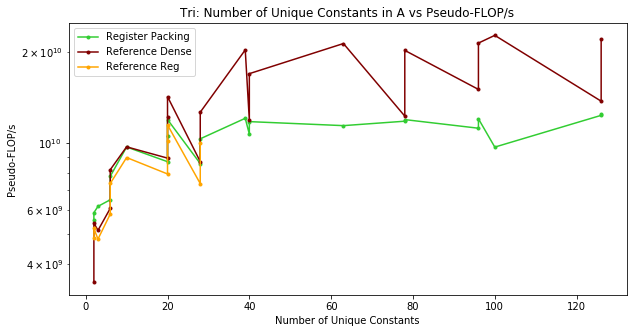

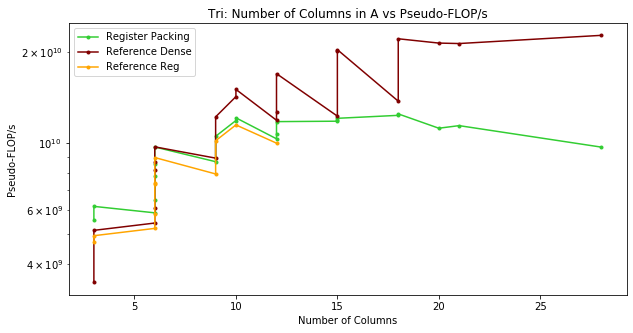

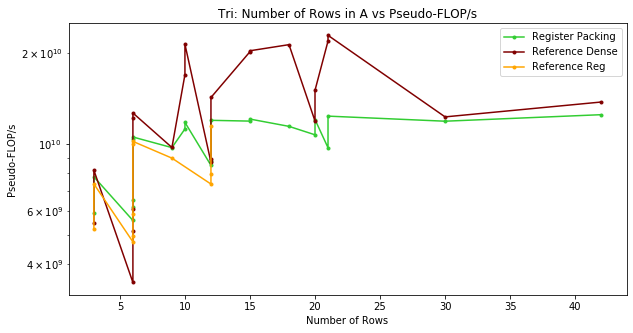

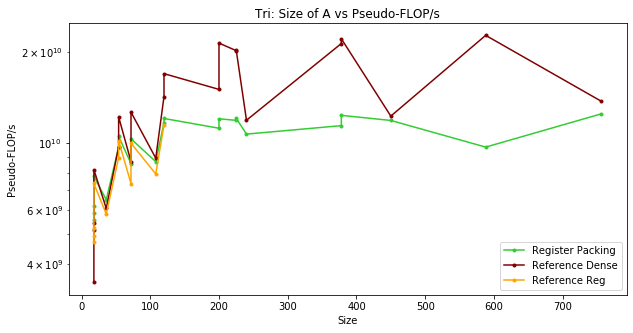

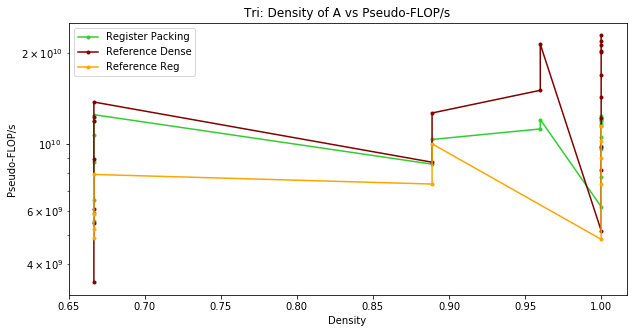

In [21]:
for i, x_term in enumerate(x_terms):
    # plot best
    plt.figure(figsize=(10,5))
    local_best_x1, local_best_y1, ref_best_x1, ref_best_y1 = \
        sort_values(x_term, run_1["tri"], mat_flops, 'best')
    local_best_x2, local_best_y2, ref_best_x2, ref_best_y2 = \
        sort_values(x_term, run_2["tri"], mat_flops, 'best')
    local_best_x3, local_best_y3, ref_best_x3, ref_best_y3 = \
        sort_values(x_term, run_3["tri"], mat_flops, 'best')
    local_best_y_avg = [sum(elem)/len(elem) for elem in zip(local_best_y1, local_best_y2, local_best_y3)]
    ref_best_y_avg = [sum(elem)/len(elem) for elem in zip(ref_best_y1, ref_best_y2, ref_best_y3)]
    
    _, _, dense_best_x1, dense_best_y1 = \
        sort_values(x_term, dense_run_1["tri"], mat_flops, 'best')
    _, _, dense_best_x2, dense_best_y2 = \
        sort_values(x_term, dense_run_2["tri"], mat_flops, 'best')
    _, _, dense_best_x3, dense_best_y3 = \
        sort_values(x_term, dense_run_3["tri"], mat_flops, 'best')
    dense_best_y_avg = [sum(elem)/len(elem) for elem in zip(dense_best_y1, dense_best_y2, dense_best_y3)]

    _, _, small_best_x1, small_best_y1 = \
        sort_values(x_term, small_run_1["tri"], mat_flops_small, 'best')
    _, _, small_best_x2, small_best_y2 = \
        sort_values(x_term, small_run_2["tri"], mat_flops_small, 'best')
    _, _, small_best_x3, small_best_y3 = \
        sort_values(x_term, small_run_3["tri"], mat_flops_small, 'best')
    small_best_y_avg = [sum(elem)/len(elem) for elem in zip(small_best_y1, small_best_y2, small_best_y3)]

    plt.plot(local_best_x1, local_best_y_avg, label="Register Packing", color="limegreen", marker=".")
    #plt.plot(ref_best_x1, ref_best_y_avg, label="Reference", color="maroon", marker=".")
    plt.plot(dense_best_x1, dense_best_y_avg, label="Reference Dense", color="maroon", marker=".")
    plt.plot(small_best_x1, small_best_y_avg, label="Reference Reg", color="orange", marker=".")

    plt.xlabel(xlabels[i])
    plt.ylabel("Pseudo-FLOP/s")
    plt.yscale("log", basey=10)
    plt.title("Tri: " + xtitles[i] + " vs Pseudo-FLOP/s")
    plt.legend()
    plt.savefig("./../../plots/reg_packing_comp/pyfr/tri/"+x_term+".pdf")
    plt.show()